# Venture Funding with Deep Learning

You work as a risk management associate at Alphabet Soup, a venture capital firm. Alphabet Soup’s business team receives many funding applications from startups every day. This team has asked you to help them create a model that predicts whether applicants will be successful if funded by Alphabet Soup.

The business team has given you a CSV containing more than 34,000 organizations that have received funding from Alphabet Soup over the years. With your knowledge of machine learning and neural networks, you decide to use the features in the provided dataset to create a binary classifier model that will predict whether an applicant will become a successful business. The CSV file contains a variety of information about these businesses, including whether or not they ultimately became successful.

## Instructions:

The steps for this challenge are broken out into the following sections:

* Prepare the data for use on a neural network model.

* Compile and evaluate a binary classification model using a neural network.

* Optimize the neural network model.

### Prepare the Data for Use on a Neural Network Model 

Using your knowledge of Pandas and scikit-learn’s `StandardScaler()`, preprocess the dataset so that you can use it to compile and evaluate the neural network model later.

Open the starter code file, and complete the following data preparation steps:

1. Read the `applicants_data.csv` file into a Pandas DataFrame. Review the DataFrame, looking for categorical variables that will need to be encoded, as well as columns that could eventually define your features and target variables.   

2. Drop the “EIN” (Employer Identification Number) and “NAME” columns from the DataFrame, because they are not relevant to the binary classification model.
 
3. Encode the dataset’s categorical variables using `OneHotEncoder`, and then place the encoded variables into a new DataFrame.

4. Add the original DataFrame’s numerical variables to the DataFrame containing the encoded variables.

> **Note** To complete this step, you will employ the Pandas `concat()` function that was introduced earlier in this course. 

5. Using the preprocessed data, create the features (`X`) and target (`y`) datasets. The target dataset should be defined by the preprocessed DataFrame column “IS_SUCCESSFUL”. The remaining columns should define the features dataset. 

6. Split the features and target sets into training and testing datasets.

7. Use scikit-learn's `StandardScaler` to scale the features data.

### Compile and Evaluate a Binary Classification Model Using a Neural Network

Use your knowledge of TensorFlow to design a binary classification deep neural network model. This model should use the dataset’s features to predict whether an Alphabet Soup&ndash;funded startup will be successful based on the features in the dataset. Consider the number of inputs before determining the number of layers that your model will contain or the number of neurons on each layer. Then, compile and fit your model. Finally, evaluate your binary classification model to calculate the model’s loss and accuracy. 
 
To do so, complete the following steps:

1. Create a deep neural network by assigning the number of input features, the number of layers, and the number of neurons on each layer using Tensorflow’s Keras.

> **Hint** You can start with a two-layer deep neural network model that uses the `relu` activation function for both layers.

2. Compile and fit the model using the `binary_crossentropy` loss function, the `adam` optimizer, and the `accuracy` evaluation metric.

> **Hint** When fitting the model, start with a small number of epochs, such as 20, 50, or 100.

3. Evaluate the model using the test data to determine the model’s loss and accuracy.

4. Save and export your model to an HDF5 file, and name the file `AlphabetSoup.h5`. 

### Optimize the Neural Network Model

Using your knowledge of TensorFlow and Keras, optimize your model to improve the model's accuracy. Even if you do not successfully achieve a better accuracy, you'll need to demonstrate at least two attempts to optimize the model. You can include these attempts in your existing notebook. Or, you can make copies of the starter notebook in the same folder, rename them, and code each model optimization in a new notebook. 

> **Note** You will not lose points if your model does not achieve a high accuracy, as long as you make at least two attempts to optimize the model.

To do so, complete the following steps:

1. Define at least three new deep neural network models (the original plus 2 optimization attempts). With each, try to improve on your first model’s predictive accuracy.

> **Rewind** Recall that perfect accuracy has a value of 1, so accuracy improves as its value moves closer to 1. To optimize your model for a predictive accuracy as close to 1 as possible, you can use any or all of the following techniques:
>
> * Adjust the input data by dropping different features columns to ensure that no variables or outliers confuse the model.
>
> * Add more neurons (nodes) to a hidden layer.
>
> * Add more hidden layers.
>
> * Use different activation functions for the hidden layers.
>
> * Add to or reduce the number of epochs in the training regimen.

2. After finishing your models, display the accuracy scores achieved by each model, and compare the results.

3. Save each of your models as an HDF5 file.


In [168]:
pd.__version__

'1.3.5'

In [1]:
# Imports
import pandas as pd
import tensorflow as tf
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,OneHotEncoder

---

## Prepare the data to be used on a neural network model

### Step 1: Read the `applicants_data.csv` file into a Pandas DataFrame. Review the DataFrame, looking for categorical variables that will need to be encoded, as well as columns that could eventually define your features and target variables.  


In [2]:
# Upload credit_card_transactions.csv to Colab
from google.colab import files

csv_file = files.upload()

Saving applicants_data.csv to applicants_data.csv


In [3]:
# Read the applicants_data.csv file from the Resources folder into a Pandas DataFrame
applicant_data_df = pd.read_csv("applicants_data.csv")

# Review the DataFrame
applicant_data_df.head()


,EIN,NAME,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,10520599,BLUE KNIGHTS MOTORCYCLE CLUB,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,10531628,AMERICAN CHESAPEAKE CLUB CHARITABLE TR,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,10547893,ST CLOUD PROFESSIONAL FIREFIGHTERS,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,10553066,SOUTHSIDE ATHLETIC ASSOCIATION,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,10556103,GENETIC RESEARCH INSTITUTE OF THE DESERT,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


In [69]:
# Review the data types associated with the columns
applicant_data_df.dtypes

EIN                        int64
NAME                      object
APPLICATION_TYPE          object
AFFILIATION               object
CLASSIFICATION            object
USE_CASE                  object
ORGANIZATION              object
STATUS                     int64
INCOME_AMT                object
SPECIAL_CONSIDERATIONS    object
ASK_AMT                    int64
IS_SUCCESSFUL              int64
dtype: object

### Step 2: Drop the “EIN” (Employer Identification Number) and “NAME” columns from the DataFrame, because they are not relevant to the binary classification model.

In [70]:
# Drop the 'EIN' and 'NAME' columns from the DataFrame
applicant_data_df = applicant_data_df.drop(columns = ["EIN", "NAME"])

# Review the DataFrame
applicant_data_df.head()


,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


### Step 3: Encode the dataset’s categorical variables using `OneHotEncoder`, and then place the encoded variables into a new DataFrame.

In [71]:
# Create a list of categorical variables 
categorical_variables = ["APPLICATION_TYPE", "AFFILIATION", "CLASSIFICATION", "USE_CASE", "ORGANIZATION", "INCOME_AMT", "SPECIAL_CONSIDERATIONS"]

# Display the categorical variables list
categorical_variables


['APPLICATION_TYPE',
 'AFFILIATION',
 'CLASSIFICATION',
 'USE_CASE',
 'ORGANIZATION',
 'INCOME_AMT',
 'SPECIAL_CONSIDERATIONS']

In [72]:
# Create a OneHotEncoder instance
enc = OneHotEncoder(sparse=False)


In [73]:
# Encode the categorcal variables using OneHotEncoder
encoded_data = enc.fit_transform(applicant_data_df[categorical_variables])


In [74]:
# Create a DataFrame with the encoded variables
encoded_df = pd.DataFrame(
    encoded_data,
    columns = enc.get_feature_names(categorical_variables)
)

# Review the DataFrame
encoded_df.head()


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,APPLICATION_TYPE_T10,APPLICATION_TYPE_T12,APPLICATION_TYPE_T13,APPLICATION_TYPE_T14,APPLICATION_TYPE_T15,APPLICATION_TYPE_T17,APPLICATION_TYPE_T19,APPLICATION_TYPE_T2,APPLICATION_TYPE_T25,APPLICATION_TYPE_T29,...,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M,SPECIAL_CONSIDERATIONS_N,SPECIAL_CONSIDERATIONS_Y
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


### Step 4: Add the original DataFrame’s numerical variables to the DataFrame containing the encoded variables.

> **Note** To complete this step, you will employ the Pandas `concat()` function that was introduced earlier in this course. 

In [75]:
# Add the numerical variables from the original DataFrame to the one-hot encoding DataFrame
encoded_df = pd.concat([encoded_df, applicant_data_df[["STATUS", "ASK_AMT", "IS_SUCCESSFUL"]]], axis=1)

# Review the Dataframe
encoded_df.head()


,APPLICATION_TYPE_T10,APPLICATION_TYPE_T12,APPLICATION_TYPE_T13,APPLICATION_TYPE_T14,APPLICATION_TYPE_T15,APPLICATION_TYPE_T17,APPLICATION_TYPE_T19,APPLICATION_TYPE_T2,APPLICATION_TYPE_T25,APPLICATION_TYPE_T29,...,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M,SPECIAL_CONSIDERATIONS_N,SPECIAL_CONSIDERATIONS_Y,STATUS,ASK_AMT,IS_SUCCESSFUL
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1,5000,1
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1,108590,1
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1,5000,0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1,6692,1
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1,142590,1


### Step 5: Using the preprocessed data, create the features (`X`) and target (`y`) datasets. The target dataset should be defined by the preprocessed DataFrame column “IS_SUCCESSFUL”. The remaining columns should define the features dataset. 



In [76]:
# Define the target set y using the IS_SUCCESSFUL column
y = encoded_df[["IS_SUCCESSFUL"]]

# Display a sample of y
y[0:5]


,IS_SUCCESSFUL
0,1
1,1
2,0
3,1
4,1


In [77]:
# Define features set X by selecting all columns but IS_SUCCESSFUL
X = encoded_df.drop(columns = "IS_SUCCESSFUL")

# Review the features DataFrame
X.head()


,APPLICATION_TYPE_T10,APPLICATION_TYPE_T12,APPLICATION_TYPE_T13,APPLICATION_TYPE_T14,APPLICATION_TYPE_T15,APPLICATION_TYPE_T17,APPLICATION_TYPE_T19,APPLICATION_TYPE_T2,APPLICATION_TYPE_T25,APPLICATION_TYPE_T29,...,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M,SPECIAL_CONSIDERATIONS_N,SPECIAL_CONSIDERATIONS_Y,STATUS,ASK_AMT
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1,5000
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1,108590
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1,5000
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1,6692
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1,142590


### Step 6: Split the features and target sets into training and testing datasets.


In [78]:
# Split the preprocessed data into a training and testing dataset
# Assign the function a random_state equal to 1
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)


### Step 7: Use scikit-learn's `StandardScaler` to scale the features data.

In [79]:
# Create a StandardScaler instance
scaler = StandardScaler()

# Fit the scaler to the features training dataset
X_scaler = scaler.fit(X_train)

# Fit the scaler to the features training dataset
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)


---

## Compile and Evaluate a Binary Classification Model Using a Neural Network

### Step 1: Create a deep neural network by assigning the number of input features, the number of layers, and the number of neurons on each layer using Tensorflow’s Keras.

> **Hint** You can start with a two-layer deep neural network model that uses the `relu` activation function for both layers.


In [80]:
# Define the the number of inputs (features) to the model
number_input_features = len(X.columns)

# Review the number of features
number_input_features


116

In [81]:
# Define the number of neurons in the output layer
number_output_neurons = 1

In [82]:
# Define the number of hidden nodes for the first hidden layer
hidden_nodes_layer1 =  5

# Review the number hidden nodes in the first layer
hidden_nodes_layer1


5

In [83]:
# Define the number of hidden nodes for the second hidden layer
hidden_nodes_layer2 =  5

# Review the number hidden nodes in the second layer
hidden_nodes_layer2


5

In [84]:
# Create the Sequential model instance
nn = Sequential()


In [85]:
# Add the first hidden layer
nn.add(Dense(units=hidden_nodes_layer1, activation="relu", input_dim=number_input_features))


In [86]:
# Add the second hidden layer
nn.add(Dense(units=hidden_nodes_layer2, activation="relu"))


In [87]:
# Add the output layer to the model specifying the number of output neurons and activation function
nn.add(
    Dense(units=1, activation="sigmoid")
)


In [88]:
# Display the Sequential model summary
nn.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 5)                 585       
                                                                 
 dense_1 (Dense)             (None, 5)                 30        
                                                                 
 dense_2 (Dense)             (None, 1)                 6         
                                                                 
Total params: 621
Trainable params: 621
Non-trainable params: 0
_________________________________________________________________


### Step 2: Compile and fit the model using the `binary_crossentropy` loss function, the `adam` optimizer, and the `accuracy` evaluation metric.


In [89]:
# Compile the Sequential model
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])


In [90]:
# Fit the model using 50 epochs and the training data
model = nn.fit(X_train_scaled, y_train, epochs=50, verbose=1)


Epoch 1/50
804/804 [==============================] - 3s 2ms/step - loss: 0.6100 - accuracy: 0.6912
Epoch 2/50
804/804 [==============================] - 2s 2ms/step - loss: 0.5677 - accuracy: 0.7222
Epoch 3/50
804/804 [==============================] - 2s 2ms/step - loss: 0.5586 - accuracy: 0.7273
Epoch 4/50
804/804 [==============================] - 2s 2ms/step - loss: 0.5552 - accuracy: 0.7285
Epoch 5/50
804/804 [==============================] - 2s 2ms/step - loss: 0.5532 - accuracy: 0.7301
Epoch 6/50
804/804 [==============================] - 2s 2ms/step - loss: 0.5518 - accuracy: 0.7297
Epoch 7/50
804/804 [==============================] - 2s 2ms/step - loss: 0.5506 - accuracy: 0.7305
Epoch 8/50
804/804 [==============================] - 2s 2ms/step - loss: 0.5499 - accuracy: 0.7310
Epoch 9/50
804/804 [==============================] - 2s 2ms/step - loss: 0.5494 - accuracy: 0.7312
Epoch 10/50
804/804 [==============================] - 2s 2ms/step - loss: 0.5490 - accuracy: 0.7308

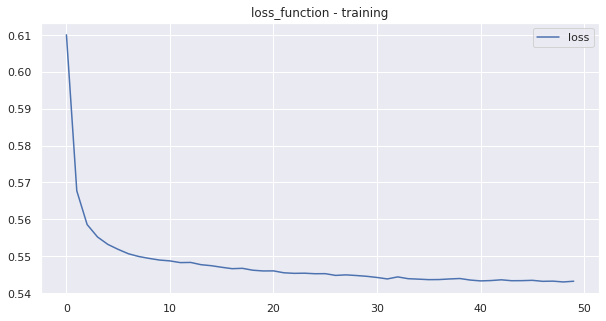

In [103]:
# Plot the train function
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
plt.plot(model.history["loss"])
plt.title("loss_function - training")
plt.legend(["loss"])
plt.show()

#loss function is improving over time

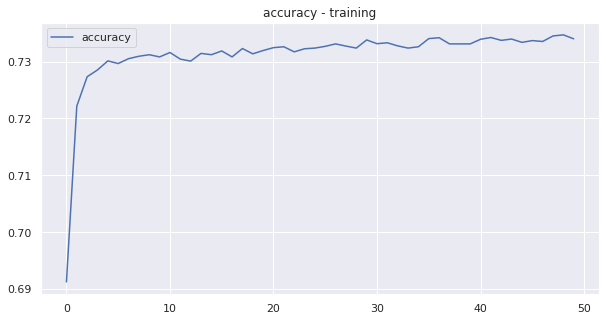

In [105]:
# Plot the train function
#import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
plt.plot(model.history["accuracy"])
plt.title("accuracy - training")
plt.legend(["accuracy"])
plt.show()

#accuracy is improving over time


### Step 3: Evaluate the model using the test data to determine the model’s loss and accuracy.


In [106]:
# Evaluate the model loss and accuracy metrics using the evaluate method and the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled, y_test, verbose=2)

# Display the model loss and accuracy results
print(f"Loss: {model_loss:0.2f}, Accuracy: {model_accuracy:0.2f}")

268/268 - 1s - loss: 0.5619 - accuracy: 0.7275 - 535ms/epoch - 2ms/step
Loss: 0.56, Accuracy: 0.73


### Step 4: Save and export your model to an HDF5 file, and name the file `AlphabetSoup.h5`. 


In [107]:
# Set the model's file path
file_path = "../Resources/model.h5" #not really needed for GC

# Export your model to a HDF5 file
nn.save_weights("model.h5")


---

## Optimize the neural network model


### Step 1: Define at least three new deep neural network models (resulting in the original plus 3 optimization attempts). With each, try to improve on your first model’s predictive accuracy.

> **Rewind** Recall that perfect accuracy has a value of 1, so accuracy improves as its value moves closer to 1. To optimize your model for a predictive accuracy as close to 1 as possible, you can use any or all of the following techniques:
>
> * Adjust the input data by dropping different features columns to ensure that no variables or outliers confuse the model.
>
> * Add more neurons (nodes) to a hidden layer.
>
> * Add more hidden layers.
>
> * Use different activation functions for the hidden layers.
>
> * Add to or reduce the number of epochs in the training regimen.


### Alternative Model 1

In [108]:
# Define the the number of inputs (features) to the model
number_input_features = len(X_train.iloc[0])

# Review the number of features
number_input_features

116

In [109]:
# Define the number of neurons in the output layer
number_output_neurons_A1 = 1
number_output_neurons_A1

1

In [110]:
# Define the number of hidden nodes for the first hidden layer
hidden_nodes_layer1_A1 = 59 #(Approx #inputs + outputs)/2

# Review the number of hidden nodes in the first layer
hidden_nodes_layer1_A1

59

In [111]:
# Define the number of hidden nodes for the second hidden layer
hidden_nodes_layer2_A1 = 30 #(Approx #inputs + outputs)/2

# Review the number of hidden nodes in the first layer
hidden_nodes_layer2_A1

30

In [112]:
# Create the Sequential model instance
nn_A1 = Sequential()

In [113]:
# First hidden layer
nn_A1.add(Dense(units=hidden_nodes_layer1_A1, input_dim = number_input_features, activation = "relu"))

# Second hidden layer
nn_A1.add(Dense(units=hidden_nodes_layer2_A1, activation = "relu"))

# Output layer
nn_A1.add(Dense(units = 1, activation = "sigmoid"))


# Check the structure of the model
nn_A1.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 59)                6903      
                                                                 
 dense_4 (Dense)             (None, 30)                1800      
                                                                 
 dense_5 (Dense)             (None, 1)                 31        
                                                                 
Total params: 8,734
Trainable params: 8,734
Non-trainable params: 0
_________________________________________________________________


In [114]:
# Compile the Sequential model
nn_A1.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])


In [115]:
model_A1 = nn_A1.fit(X_train_scaled, y_train, epochs=50, verbose=1)

Epoch 1/50
804/804 [==============================] - 3s 3ms/step - loss: 0.5758 - accuracy: 0.7191
Epoch 2/50
804/804 [==============================] - 2s 3ms/step - loss: 0.5529 - accuracy: 0.7296
Epoch 3/50
804/804 [==============================] - 2s 3ms/step - loss: 0.5492 - accuracy: 0.7318
Epoch 4/50
804/804 [==============================] - 2s 2ms/step - loss: 0.5468 - accuracy: 0.7332
Epoch 5/50
804/804 [==============================] - 2s 3ms/step - loss: 0.5457 - accuracy: 0.7329
Epoch 6/50
804/804 [==============================] - 2s 2ms/step - loss: 0.5442 - accuracy: 0.7338
Epoch 7/50
804/804 [==============================] - 2s 2ms/step - loss: 0.5441 - accuracy: 0.7353
Epoch 8/50
804/804 [==============================] - 2s 3ms/step - loss: 0.5427 - accuracy: 0.7349
Epoch 9/50
804/804 [==============================] - 2s 3ms/step - loss: 0.5419 - accuracy: 0.7354
Epoch 10/50
804/804 [==============================] - 2s 2ms/step - loss: 0.5414 - accuracy: 0.7356

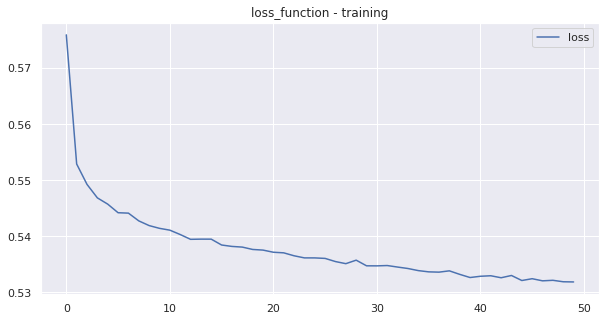

In [117]:
# Plot the train function

plt.figure(figsize=(10,5))


plt.plot(model_A1.history["loss"])
plt.title("loss_function - training")
plt.legend(["loss"])
plt.show()

#loss function improving over time

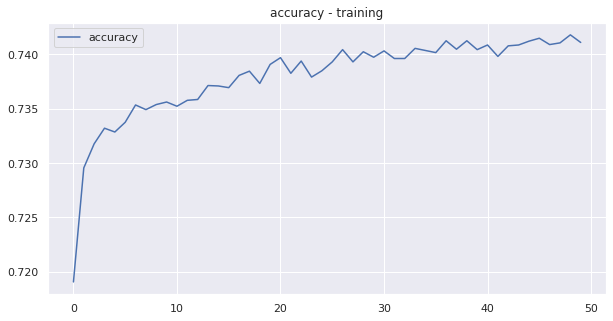

In [118]:
# Plot the train function

plt.figure(figsize=(10,5))

plt.plot(model_A1.history["accuracy"])
plt.title("accuracy - training")
plt.legend(["accuracy"])
plt.show()

#accuracy improving over time

In [119]:
# Evaluate the model loss and accuracy metrics using the evaluate method and the test data
model_A1_loss, model_A1_accuracy = nn_A1.evaluate(X_test_scaled, y_test, verbose=2)

# Display the model loss and accuracy results
print(f"Loss: {model_A1_loss:0.2f}, Accuracy: {model_A1_accuracy:0.2f}")

268/268 - 1s - loss: 0.5546 - accuracy: 0.7299 - 619ms/epoch - 2ms/step
Loss: 0.55, Accuracy: 0.73


#### Feature Engineering

The dataset is further explored below, simply by taking the mean of "IS_SUCCESSFUL" over each of the labels in each categorical data column.

In [22]:
applicant_data_df.groupby("APPLICATION_TYPE").mean()
#all of the T14, T15, T17, T29 applications are successful
#80-100% range are T10, T12, T13
#T19 has the lowest success rate at 19%

,EIN,STATUS,ASK_AMT,IS_SUCCESSFUL
APPLICATION_TYPE,,,,
T10,4.235609e+08,1.000000,3.386768e+04,0.878788
T12,6.229615e+08,1.000000,1.573745e+07,0.888889
T13,4.864526e+08,1.000000,3.094980e+04,0.924242
T14,6.058939e+08,1.000000,2.419235e+08,1.000000
T15,9.803989e+08,1.000000,1.053620e+05,1.000000
T17,9.007570e+08,1.000000,5.034370e+05,1.000000
T19,5.708515e+08,1.000000,1.602455e+04,0.188732
T2,5.411177e+08,1.000000,1.482196e+06,0.562500
T25,6.885485e+08,1.000000,3.187816e+06,0.666667


In [23]:
applicant_data_df.groupby("AFFILIATION").mean()
#OTHER has success rate at 100%. Company sponsored is actually the least successful at 33%

,EIN,STATUS,ASK_AMT,IS_SUCCESSFUL
AFFILIATION,,,,
CompanySponsored,5.321421e+08,0.999873,8.731335e+05,0.331869
Family/Parent,5.454554e+08,1.000000,5.886390e+07,0.562500
Independent,5.077909e+08,0.999838,4.127899e+06,0.702435
National,6.316999e+08,1.000000,3.540329e+07,0.606061
Other,7.426672e+08,1.000000,4.799890e+05,1.000000
Regional,5.800417e+08,1.000000,3.622124e+06,0.615385


In [34]:
df_classification_means = applicant_data_df.groupby("CLASSIFICATION").mean().sort_values(by="IS_SUCCESSFUL", ascending = False)
df_classification_means
#SOME CLASSIFICATION TYPES HAVE 100% or 0% success rates. There's more variation in classification types though (71 different types)

,EIN,STATUS,ASK_AMT,IS_SUCCESSFUL
CLASSIFICATION,,,,
C1900,910584099.0,1.0,2791345.0,1.0
C1278,495520780.7,1.0,5000.0,1.0
C1370,810912857.0,1.0,5000.0,1.0
C1570,471416499.0,1.0,5000.0,1.0
C1580,473152367.0,1.0,5000.0,1.0
...,...,...,...,...
C1236,474071795.0,1.0,5000.0,0.0
C1820,860730202.0,1.0,88551940.0,0.0
C2600,813763304.0,1.0,5000.0,0.0


In [36]:
df_classification_means_allsuc = df_classification_means.loc[df_classification_means["IS_SUCCESSFUL"] == 1]
df_classification_means_allsuc

,EIN,STATUS,ASK_AMT,IS_SUCCESSFUL
CLASSIFICATION,,,,
C1900,9.105841e+08,1.0,2.791345e+06,1.0
C1278,4.955208e+08,1.0,5.000000e+03,1.0
C1370,8.109129e+08,1.0,5.000000e+03,1.0
C1570,4.714165e+08,1.0,5.000000e+03,1.0
C1580,4.731524e+08,1.0,5.000000e+03,1.0
C1728,4.614558e+08,1.0,5.000000e+03,1.0
C2150,9.312842e+08,1.0,5.000000e+03,1.0
C2170,4.549906e+08,1.0,1.581480e+05,1.0
C2500,4.717246e+08,1.0,5.000000e+03,1.0


In [63]:
df_classification_means_allsuc_list = df_classification_means_allsuc.index.tolist()

In [37]:
df_classification_means_allunsuc = df_classification_means.loc[df_classification_means["IS_SUCCESSFUL"] == 0]
df_classification_means_allunsuc

,EIN,STATUS,ASK_AMT,IS_SUCCESSFUL
CLASSIFICATION,,,,
C5200,721574846.0,1.0,18704.0,0.0
C6100,860695267.0,1.0,5000.0,0.0
C2380,470980513.0,1.0,5000.0,0.0
C1236,474071795.0,1.0,5000.0,0.0
C1820,860730202.0,1.0,88551940.0,0.0
C2600,813763304.0,1.0,5000.0,0.0
C2190,510189968.0,1.0,5000.0,0.0
C1732,464467761.0,1.0,5000.0,0.0


In [66]:
df_classification_means_allunsuc_list = df_classification_means_allunsuc.index.tolist()

In [39]:
df_classification_means_80plus = df_classification_means.loc[(df_classification_means["IS_SUCCESSFUL"] >= 0.8) &  (df_classification_means["IS_SUCCESSFUL"] < 1)]
df_classification_means_80plus

,EIN,STATUS,ASK_AMT,IS_SUCCESSFUL
CLASSIFICATION,,,,
C7100,4.449242e+08,1.0,4.004865e+04,0.906667
C1238,5.218388e+08,1.0,7.387100e+03,0.900000
C7000,5.011508e+08,1.0,7.292036e+05,0.893179
C7200,4.300062e+08,1.0,3.569455e+06,0.875000
C1800,5.487573e+08,1.0,2.303451e+06,0.866667
C6000,5.356744e+08,1.0,2.619938e+05,0.866667
C1230,5.095290e+08,1.0,5.512444e+03,0.833333
C7120,4.107718e+08,1.0,1.009519e+05,0.833333
C1240,4.261857e+08,1.0,2.915980e+04,0.833333


In [67]:
df_classification_means_80plus_list = df_classification_means_80plus.index.tolist()

In [40]:
df_classification_means_20minus = df_classification_means.loc[(df_classification_means["IS_SUCCESSFUL"] <= 0.2) &  (df_classification_means["IS_SUCCESSFUL"] > 0)]
df_classification_means_20minus

,EIN,STATUS,ASK_AMT,IS_SUCCESSFUL
CLASSIFICATION,,,,
C8200,3.925540e+08,1.0,331058.727273,0.090909
C5000,5.024101e+08,1.0,156793.620690,0.051724


In [68]:
df_classification_means_20minus_list = df_classification_means_20minus.index.tolist()

In [41]:
df_classification_means_middle = df_classification_means.loc[(df_classification_means["IS_SUCCESSFUL"] < 0.8) &  (df_classification_means["IS_SUCCESSFUL"] > 0.2)]
df_classification_means_middle

,EIN,STATUS,ASK_AMT,IS_SUCCESSFUL
CLASSIFICATION,,,,
C1237,5.036347e+08,1.000000,5.000000e+03,0.777778
C1270,4.996808e+08,1.000000,1.510560e+06,0.771930
C2700,4.545817e+08,1.000000,3.001725e+05,0.759615
C1250,5.423134e+08,1.000000,1.053871e+04,0.714286
C8000,4.942282e+08,1.000000,1.042914e+07,0.700000
C0,8.115718e+08,1.000000,6.875933e+04,0.666667
C1260,3.389993e+08,1.000000,5.000000e+03,0.666667
C1720,5.439473e+08,1.000000,5.000000e+03,0.666667
C2400,6.189200e+08,1.000000,2.113517e+04,0.666667


In [29]:
applicant_data_df.groupby("ORGANIZATION").mean().sort_values(by="IS_SUCCESSFUL", ascending = False)
#"Association" has the lowest success rate

,EIN,STATUS,ASK_AMT,IS_SUCCESSFUL
ORGANIZATION,,,,
Corporation,4.492383e+08,1.000000,4.463206e+05,0.767442
Co-operative,5.186554e+08,1.000000,2.394720e+07,0.755144
Trust,5.090948e+08,0.999872,3.252965e+06,0.587200
Association,5.426412e+08,0.999805,6.659926e+05,0.395222


In [28]:
applicant_data_df.groupby("USE_CASE").mean().sort_values(by="IS_SUCCESSFUL", ascending = False)
#"Other" use_case has 100% success rate. Community Serv has lowest. 

,EIN,STATUS,ASK_AMT,IS_SUCCESSFUL
USE_CASE,,,,
Other,5.018996e+08,1.000000,2.947967e+04,1.000000
Preservation,5.107858e+08,0.999893,1.969738e+06,0.538067
ProductDev,5.594942e+08,1.000000,7.630866e+05,0.519132
Heathcare,6.236718e+08,1.000000,2.417139e+08,0.431507
CommunityServ,4.988376e+08,0.994792,6.032860e+04,0.348958


In [54]:
df_incomeamt_means = applicant_data_df.groupby("INCOME_AMT").mean().sort_values(by="IS_SUCCESSFUL", ascending = False)
df_incomeamt_means
#Income in the millions seems to have lower success rates than income lower than that.  

,EIN,STATUS,ASK_AMT,IS_SUCCESSFUL
INCOME_AMT,,,,
1-9999,5.100788e+08,1.000000,6.409515e+04,0.759615
10000-24999,5.160457e+08,0.998158,8.283512e+04,0.677716
100000-499999,5.274616e+08,1.000000,3.287867e+05,0.578542
25000-99999,5.366298e+08,0.999733,3.031590e+05,0.569789
0,5.116979e+08,0.999877,6.802905e+03,0.515704
5M-10M,5.603111e+08,1.000000,1.087296e+07,0.470270
1M-5M,5.705202e+08,1.000000,3.334235e+06,0.465969
10M-50M,5.834163e+08,1.000000,2.962329e+07,0.404167
50M+,7.033361e+08,1.000000,5.767817e+08,0.338129


In [61]:
import numpy as np
df_incomeamt_means["INCOME_AMT_NUM"] = 0
df_incomeamt_means.loc[(df_incomeamt_means.index == "1-9999"), 'INCOME_AMT_NUM'] = (1+9999)/2
df_incomeamt_means.loc[(df_incomeamt_means.index == "10000-24999"), 'INCOME_AMT_NUM'] = (1000+24999)/2
df_incomeamt_means.loc[(df_incomeamt_means.index == "100000-499999"), 'INCOME_AMT_NUM'] = (100000+499999)/2
df_incomeamt_means.loc[(df_incomeamt_means.index == "25000-99999"), 'INCOME_AMT_NUM'] = (25000+99999)/2
df_incomeamt_means.loc[(df_incomeamt_means.index == "0"), 'INCOME_AMT_NUM'] = 0
df_incomeamt_means.loc[(df_incomeamt_means.index == "5M-10M"), 'INCOME_AMT_NUM'] = (5000000+10000000)/2
df_incomeamt_means.loc[(df_incomeamt_means.index == "1M-5M"), 'INCOME_AMT_NUM'] = (1000000+5000000)/2
df_incomeamt_means.loc[(df_incomeamt_means.index == "10M-50M"), 'INCOME_AMT_NUM'] = (10000000+50000000)/2
df_incomeamt_means.loc[(df_incomeamt_means.index == "50M+"), 'INCOME_AMT_NUM'] = 50000000
df_incomeamt_means

,EIN,STATUS,ASK_AMT,IS_SUCCESSFUL,INCOME_AMT_NUM
INCOME_AMT,,,,,
1-9999,5.100788e+08,1.000000,6.409515e+04,0.759615,5000.0
10000-24999,5.160457e+08,0.998158,8.283512e+04,0.677716,12999.5
100000-499999,5.274616e+08,1.000000,3.287867e+05,0.578542,299999.5
25000-99999,5.366298e+08,0.999733,3.031590e+05,0.569789,62499.5
0,5.116979e+08,0.999877,6.802905e+03,0.515704,0.0
5M-10M,5.603111e+08,1.000000,1.087296e+07,0.470270,7500000.0
1M-5M,5.705202e+08,1.000000,3.334235e+06,0.465969,3000000.0
10M-50M,5.834163e+08,1.000000,2.962329e+07,0.404167,30000000.0
50M+,7.033361e+08,1.000000,5.767817e+08,0.338129,50000000.0


In [32]:
applicant_data_df.groupby("SPECIAL_CONSIDERATIONS").mean().sort_values(by="IS_SUCCESSFUL", ascending = False)
#special_considerations doesn't seem to be a signfiicant predictor variable

,EIN,STATUS,ASK_AMT,IS_SUCCESSFUL
SPECIAL_CONSIDERATIONS,,,,
Y,4.717188e+08,0.962963,8.460000e+03,0.62963
N,5.192226e+08,0.999883,2.771374e+06,0.53233


In [30]:
applicant_data_df.groupby("STATUS").mean().sort_values(by="IS_SUCCESSFUL", ascending = False)
#status doesn't seem to be a significant variable

,EIN,ASK_AMT,IS_SUCCESSFUL
STATUS,,,
0,4.188415e+08,5.457400e+03,0.600000
1,5.191998e+08,2.769602e+06,0.532396


In [33]:
applicant_data_df.groupby("IS_SUCCESSFUL").mean().sort_values(by="IS_SUCCESSFUL", ascending = False)
#On average, successful cases have lower asking amounts than unsuccessful cases

,EIN,STATUS,ASK_AMT
IS_SUCCESSFUL,,,
1,5.089659e+08,0.999836,1.882347e+06
0,5.308210e+08,0.999875,3.778975e+06


In [120]:
applicant_data_df.head()

,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


In [125]:
applicant_data_df_feature_eng = applicant_data_df.copy()

In [126]:
#from numerical analysis above, the status & special considerations fields didn't contain much predictive data here, as there are only two values for each column (1/0 or Y/N, respectively) and, on average, successful cases for each option are pretty similar (at between 50% to 60% of cases).
#Other variables contain more predictive power here, so the columns are dropped so that the NN model won't focus on them
applicant_data_df_feature_eng = applicant_data_df_feature_eng.drop(columns = ["STATUS", "SPECIAL_CONSIDERATIONS"])

In [169]:

np.__version__

'1.21.6'

In [131]:
#income_amt is converted into a numerical variable. From the numerical analysis above, there seem to be clear numerical trends with income_amt and the average success of different cases. Possibly, encoding the variable as numerical, instead of categorical, with help the NN understand the patterns with this field of data.
import numpy as np
applicant_data_df_feature_eng["INCOME_AMT_NUM"] = 0
applicant_data_df_feature_eng.loc[(applicant_data_df_feature_eng["INCOME_AMT"] == "1-9999"), 'INCOME_AMT_NUM'] = (1+9999)/2
applicant_data_df_feature_eng.loc[(applicant_data_df_feature_eng["INCOME_AMT"] == "1000-24999"), 'INCOME_AMT_NUM'] = (1000+24999)/2
applicant_data_df_feature_eng.loc[(applicant_data_df_feature_eng["INCOME_AMT"] == "100000-499999"), 'INCOME_AMT_NUM'] = (100000+499999)/2
applicant_data_df_feature_eng.loc[(applicant_data_df_feature_eng["INCOME_AMT"] == "25000-99999"), 'INCOME_AMT_NUM'] = (25000+99999)/2
applicant_data_df_feature_eng.loc[(applicant_data_df_feature_eng["INCOME_AMT"] == "0"), 'INCOME_AMT_NUM'] = 0
applicant_data_df_feature_eng.loc[(applicant_data_df_feature_eng["INCOME_AMT"] == "5M-10M"), 'INCOME_AMT_NUM'] = (5000000+10000000)/2
applicant_data_df_feature_eng.loc[(applicant_data_df_feature_eng["INCOME_AMT"] == "1M-5M"), 'INCOME_AMT_NUM'] = (1000000+5000000)/2
applicant_data_df_feature_eng.loc[(applicant_data_df_feature_eng["INCOME_AMT"] == "10-50M"), 'INCOME_AMT_NUM'] = (10000000+50000000)/2
applicant_data_df_feature_eng.loc[(applicant_data_df_feature_eng["INCOME_AMT"] == "50M+"), 'INCOME_AMT_NUM'] = 50000000
applicant_data_df_feature_eng["INCOME_AMT_NUM"].value_counts()

0.0           25171
62499.5        3747
299999.5       3374
3000000.0       955
5000.0          728
7500000.0       185
50000000.0      139
Name: INCOME_AMT_NUM, dtype: int64

In [132]:
applicant_data_df_feature_eng = applicant_data_df_feature_eng.drop(columns = "INCOME_AMT")
applicant_data_df_feature_eng.head()

,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,ASK_AMT,IS_SUCCESSFUL,INCOME_AMT_NUM
0,T10,Independent,C1000,ProductDev,Association,5000,1,0.0
1,T3,Independent,C2000,Preservation,Co-operative,108590,1,5000.0
2,T5,CompanySponsored,C3000,ProductDev,Association,5000,0,0.0
3,T3,CompanySponsored,C2000,Preservation,Trust,6692,1,0.0
4,T3,Independent,C1000,Heathcare,Trust,142590,1,299999.5


In [135]:
applicant_data_df_feature_eng["CLASSIFICATION_NUM"] = 0.5
applicant_data_df_feature_eng.loc[applicant_data_df_feature_eng["CLASSIFICATION"].isin(df_classification_means_20minus_list), 'CLASSIFICATION_NUM'] = 0.2
applicant_data_df_feature_eng.loc[applicant_data_df_feature_eng["CLASSIFICATION"].isin(df_classification_means_80plus_list), 'CLASSIFICATION_NUM'] = 0.8
applicant_data_df_feature_eng.loc[applicant_data_df_feature_eng["CLASSIFICATION"].isin(df_classification_means_allunsuc_list), 'CLASSIFICATION_NUM'] = 0
applicant_data_df_feature_eng.loc[applicant_data_df_feature_eng["CLASSIFICATION"].isin(df_classification_means_allsuc_list), 'CLASSIFICATION_NUM'] = 1

applicant_data_df_feature_eng["CLASSIFICATION_NUM"].value_counts()

0.5    32812
0.8     1291
0.2      127
1.0       61
0.0        8
Name: CLASSIFICATION_NUM, dtype: int64

In [172]:
# Feature engineering

In [136]:
applicant_data_df_feature_eng = applicant_data_df_feature_eng.drop(columns = "CLASSIFICATION")
applicant_data_df_feature_eng.head()


,APPLICATION_TYPE,AFFILIATION,USE_CASE,ORGANIZATION,ASK_AMT,IS_SUCCESSFUL,INCOME_AMT_NUM,CLASSIFICATION_NUM
0,T10,Independent,ProductDev,Association,5000,1,0.0,0.5
1,T3,Independent,Preservation,Co-operative,108590,1,5000.0,0.5
2,T5,CompanySponsored,ProductDev,Association,5000,0,0.0,0.5
3,T3,CompanySponsored,Preservation,Trust,6692,1,0.0,0.5
4,T3,Independent,Heathcare,Trust,142590,1,299999.5,0.5


In [138]:
applicant_data_df_feature_eng.dtypes

APPLICATION_TYPE       object
AFFILIATION            object
USE_CASE               object
ORGANIZATION           object
ASK_AMT                 int64
IS_SUCCESSFUL           int64
INCOME_AMT_NUM        float64
CLASSIFICATION_NUM    float64
dtype: object

In [141]:
#encode the categorical variables as above. 
categorical_variables_2 = ["APPLICATION_TYPE", "AFFILIATION", "USE_CASE", "ORGANIZATION"]

enc_2 = OneHotEncoder(sparse=False)
encoded_data_2 = enc_2.fit_transform(applicant_data_df_feature_eng[categorical_variables_2])

# Create a DataFrame with the encoded variables
encoded_df_2 = pd.DataFrame(
    encoded_data_2,
    columns = enc_2.get_feature_names(categorical_variables_2)
)

# Review the DataFrame
encoded_df_2.head()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,APPLICATION_TYPE_T10,APPLICATION_TYPE_T12,APPLICATION_TYPE_T13,APPLICATION_TYPE_T14,APPLICATION_TYPE_T15,APPLICATION_TYPE_T17,APPLICATION_TYPE_T19,APPLICATION_TYPE_T2,APPLICATION_TYPE_T25,APPLICATION_TYPE_T29,...,AFFILIATION_Regional,USE_CASE_CommunityServ,USE_CASE_Heathcare,USE_CASE_Other,USE_CASE_Preservation,USE_CASE_ProductDev,ORGANIZATION_Association,ORGANIZATION_Co-operative,ORGANIZATION_Corporation,ORGANIZATION_Trust
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [143]:
# Add the numerical variables from the original DataFrame to the one-hot encoding DataFrame
encoded_df_2 = pd.concat([encoded_df_2, applicant_data_df_feature_eng[["ASK_AMT", "IS_SUCCESSFUL", "INCOME_AMT_NUM", "CLASSIFICATION_NUM"]]], axis=1)

# Review the Dataframe
encoded_df_2.head()

,APPLICATION_TYPE_T10,APPLICATION_TYPE_T12,APPLICATION_TYPE_T13,APPLICATION_TYPE_T14,APPLICATION_TYPE_T15,APPLICATION_TYPE_T17,APPLICATION_TYPE_T19,APPLICATION_TYPE_T2,APPLICATION_TYPE_T25,APPLICATION_TYPE_T29,...,USE_CASE_Preservation,USE_CASE_ProductDev,ORGANIZATION_Association,ORGANIZATION_Co-operative,ORGANIZATION_Corporation,ORGANIZATION_Trust,ASK_AMT,IS_SUCCESSFUL,INCOME_AMT_NUM,CLASSIFICATION_NUM
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,1.0,0.0,0.0,0.0,5000,1,0.0,0.5
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,108590,1,5000.0,0.5
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,1.0,0.0,0.0,0.0,5000,0,0.0,0.5
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,6692,1,0.0,0.5
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,142590,1,299999.5,0.5


In [144]:
# Define the target set y using the IS_SUCCESSFUL column
y_2 = encoded_df_2[["IS_SUCCESSFUL"]]

# Display a sample of y
y_2[0:5]


,IS_SUCCESSFUL
0,1
1,1
2,0
3,1
4,1


In [145]:
# Define features set X by selecting all columns but IS_SUCCESSFUL
X_2 = encoded_df_2.drop(columns = "IS_SUCCESSFUL")

# Review the features DataFrame
X_2.head()


,APPLICATION_TYPE_T10,APPLICATION_TYPE_T12,APPLICATION_TYPE_T13,APPLICATION_TYPE_T14,APPLICATION_TYPE_T15,APPLICATION_TYPE_T17,APPLICATION_TYPE_T19,APPLICATION_TYPE_T2,APPLICATION_TYPE_T25,APPLICATION_TYPE_T29,...,USE_CASE_Other,USE_CASE_Preservation,USE_CASE_ProductDev,ORGANIZATION_Association,ORGANIZATION_Co-operative,ORGANIZATION_Corporation,ORGANIZATION_Trust,ASK_AMT,INCOME_AMT_NUM,CLASSIFICATION_NUM
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,5000,0.0,0.5
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,108590,5000.0,0.5
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,5000,0.0,0.5
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,6692,0.0,0.5
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,142590,299999.5,0.5


In [146]:
# Split the preprocessed data into a training and testing dataset
# Assign the function a random_state equal to 1
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X_2, y_2, random_state=1)

In [148]:
# Create a StandardScaler instance
scaler_2 = StandardScaler()

# Fit the scaler to the features training dataset
X_scaler_2 = scaler_2.fit(X_train_2)

# Fit the scaler to the features training dataset
X_train_scaled_2 = X_scaler_2.transform(X_train_2)
X_test_scaled_2 = X_scaler_2.transform(X_test_2)

In [173]:
# Alternative model after feature engineering has been done

In [149]:
#creating the same structure as was in model before to compare the affects of feature optimization:

# Define the the number of inputs (features) to the model
number_input_features_2 = len(X_2.columns)

# Define the number of neurons in the output layer
number_output_neurons_2 = 1

# Define the number of hidden nodes for the first hidden layer
hidden_nodes_layer1_2 =  5

# Define the number of hidden nodes for the second hidden layer
hidden_nodes_layer2_2 =  5

# Create the Sequential model instance
nn_2 = Sequential()


# Add the first hidden layer
nn_2.add(Dense(units=hidden_nodes_layer1_2, activation="relu", input_dim=number_input_features_2))


# Add the second hidden layer
nn_2.add(Dense(units=hidden_nodes_layer2_2, activation="relu"))


# Add the output layer to the model specifying the number of output neurons and activation function
nn_2.add(
    Dense(units=1, activation="sigmoid")
)


# Display the Sequential model summary
nn_2.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 5)                 180       
                                                                 
 dense_7 (Dense)             (None, 5)                 30        
                                                                 
 dense_8 (Dense)             (None, 1)                 6         
                                                                 
Total params: 216
Trainable params: 216
Non-trainable params: 0
_________________________________________________________________


In [150]:
# Compile the Sequential model
nn_2.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [151]:
# Fit the model using 50 epochs and the training data
model_2 = nn_2.fit(X_train_scaled_2, y_train_2, epochs=50, verbose=1)

Epoch 1/50
804/804 [==============================] - 4s 4ms/step - loss: 0.6251 - accuracy: 0.6876
Epoch 2/50
804/804 [==============================] - 1s 2ms/step - loss: 0.5842 - accuracy: 0.7164
Epoch 3/50
804/804 [==============================] - 1s 2ms/step - loss: 0.5753 - accuracy: 0.7225
Epoch 4/50
804/804 [==============================] - 2s 2ms/step - loss: 0.5698 - accuracy: 0.7235
Epoch 5/50
804/804 [==============================] - 1s 2ms/step - loss: 0.5674 - accuracy: 0.7253
Epoch 6/50
804/804 [==============================] - 2s 2ms/step - loss: 0.5663 - accuracy: 0.7259
Epoch 7/50
804/804 [==============================] - 2s 2ms/step - loss: 0.5658 - accuracy: 0.7269
Epoch 8/50
804/804 [==============================] - 2s 2ms/step - loss: 0.5652 - accuracy: 0.7273
Epoch 9/50
804/804 [==============================] - 3s 3ms/step - loss: 0.5650 - accuracy: 0.7274
Epoch 10/50
804/804 [==============================] - 2s 2ms/step - loss: 0.5647 - accuracy: 0.7274

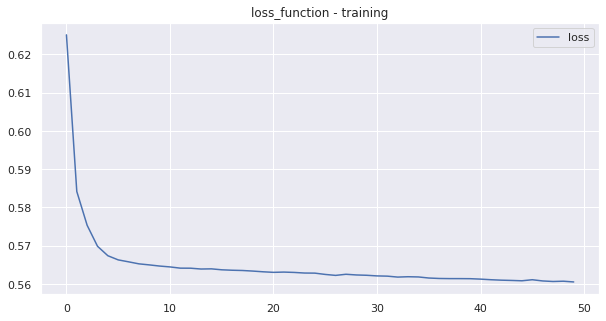

In [152]:
# Plot the train function
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
plt.plot(model_2.history["loss"])
plt.title("loss_function - training")
plt.legend(["loss"])
plt.show()

#loss function is improving over time

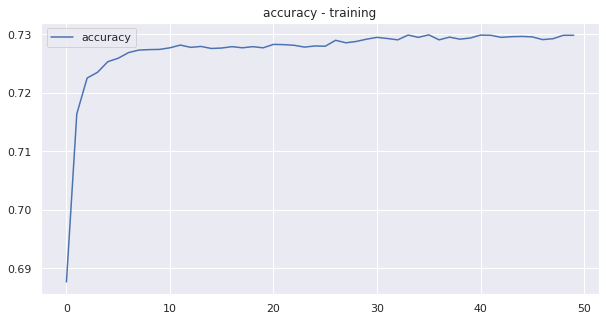

In [153]:
# Plot the train function
#import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
plt.plot(model_2.history["accuracy"])
plt.title("accuracy - training")
plt.legend(["accuracy"])
plt.show()


In [154]:
# Evaluate the model loss and accuracy metrics using the evaluate method and the test data
model_loss_2, model_accuracy_2 = nn_2.evaluate(X_test_scaled_2, y_test_2, verbose=2)

268/268 - 0s - loss: 0.5662 - accuracy: 0.7254 - 427ms/epoch - 2ms/step


In [155]:
# Set the model's file path
file_path = "../Resources/model.h5" #not really needed for GC

# Export your model to a HDF5 file
nn_2.save_weights("model_2.h5")

In [175]:
#Alternative model, using the dataset that has been "feature engineered", but this time with more neurons in the hidden layers, as in model_A1

In [170]:
#creating the same structure as was in model before to compare the affects of feature optimization:

# Define the the number of inputs (features) to the model
number_input_features_2a = len(X_2.columns)

# Define the number of neurons in the output layer
number_output_neurons_2a = 1

# Define the number of hidden nodes for the first hidden layer
hidden_nodes_layer1_2a =  59

# Define the number of hidden nodes for the second hidden layer
hidden_nodes_layer2_2a =  30

# Create the Sequential model instance
nn_2a = Sequential()


# Add the first hidden layer
nn_2a.add(Dense(units=hidden_nodes_layer1_2a, activation="relu", input_dim=number_input_features_2a))


# Add the second hidden layer
nn_2a.add(Dense(units=hidden_nodes_layer2_2a, activation="relu"))


# Add the output layer to the model specifying the number of output neurons and activation function
nn_2a.add(
    Dense(units=1, activation="sigmoid")
)


# Display the Sequential model summary
nn_2a.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 59)                2124      
                                                                 
 dense_13 (Dense)            (None, 30)                1800      
                                                                 
 dense_14 (Dense)            (None, 1)                 31        
                                                                 
Total params: 3,955
Trainable params: 3,955
Non-trainable params: 0
_________________________________________________________________


In [171]:
# Compile the Sequential model
nn_2a.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

# Fit the model using 50 epochs and the training data
model_2a = nn_2a.fit(X_train_scaled_2, y_train_2, epochs=50, verbose=1)

Epoch 1/50
804/804 [==============================] - 3s 3ms/step - loss: 0.5792 - accuracy: 0.7184
Epoch 2/50
804/804 [==============================] - 1s 2ms/step - loss: 0.5680 - accuracy: 0.7258
Epoch 3/50
804/804 [==============================] - 1s 2ms/step - loss: 0.5654 - accuracy: 0.7265
Epoch 4/50
804/804 [==============================] - 2s 2ms/step - loss: 0.5652 - accuracy: 0.7279
Epoch 5/50
804/804 [==============================] - 2s 2ms/step - loss: 0.5647 - accuracy: 0.7280
Epoch 6/50
804/804 [==============================] - 2s 2ms/step - loss: 0.5642 - accuracy: 0.7280
Epoch 7/50
804/804 [==============================] - 2s 2ms/step - loss: 0.5638 - accuracy: 0.7283
Epoch 8/50
804/804 [==============================] - 2s 2ms/step - loss: 0.5634 - accuracy: 0.7285
Epoch 9/50
804/804 [==============================] - 2s 2ms/step - loss: 0.5630 - accuracy: 0.7282
Epoch 10/50
804/804 [==============================] - 2s 2ms/step - loss: 0.5623 - accuracy: 0.7282

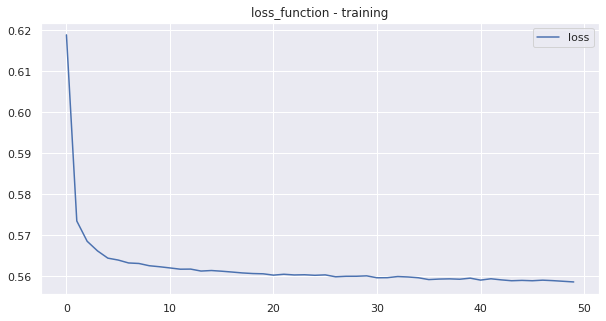

In [159]:
# Plot the train function
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
plt.plot(model_2a.history["loss"])
plt.title("loss_function - training")
plt.legend(["loss"])
plt.show()

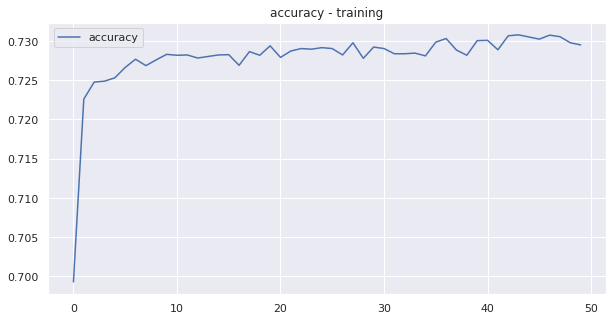

In [160]:
# Plot the train function
#import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
plt.plot(model_2a.history["accuracy"])
plt.title("accuracy - training")
plt.legend(["accuracy"])
plt.show()


In [162]:
# Evaluate the model loss and accuracy metrics using the evaluate method and the test data
model_loss_2a, model_accuracy_2a = nn_2a.evaluate(X_test_scaled_2, y_test_2, verbose=2)

268/268 - 1s - loss: 0.5636 - accuracy: 0.7270 - 759ms/epoch - 3ms/step


In [164]:
# Set the model's file path
file_path = "../Resources/model.h5" #not really needed for GC

# Export your model to a HDF5 file
nn_2a.save_weights("model_2a.h5")